<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_010_ExamForEdu/_000_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 아이리스 손글씨 데이터 예측하기

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [143]:
(x_train, y_train), (x_test, y_test) = mnist.load_data('iris')

In [134]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

- 6만개 행과, (28, 28) shape를 가진 데이터
- 6만개 정답 라벨로 [0], [1], [2] ... [9]의 데이터
  + 1번 행의 정답은 5
  + 2번 행의 정답은 0
  + 3번 행의 정답은 4


## 값 정규화

In [ ]:
x_train, x_test = x_train / 255., x_test / 255.

- 최대값 255로 나누는 작업
- 수치가 낮아짐
- 특성은 유지됨

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Model 선언

In [ ]:
class CustomModel(tf.keras.Model):
  def __init__(self, lr):
    super(CustomModel, self).__init__(name='CM')
    self.flatten = tf.keras.layers.Flatten()
    self.hidden = layers.Dense(kwargs.get('hidden_dimension', 256))
    self.bat = layers.BatchNormalization()
    self.act = layers.Activation(activation='swish')
    self.dropout = tf.keras.layers.Dropout(rate=lr)
    self.hidden2 = layers.Dense(kwargs.get('hidden2_dimension', 128))
    self.bat2 = layers.BatchNormalization()
    self.hidden3 = layers.Dense(kwargs.get('hidden3_dimension', 10), activation='softmax')
    
  def call(self, x):
    print(f'모델에 처음 들어온 shape: {x.shape}')
    x = self.flatten(x)
    print(f'flatten 이후 shape: {x.shape}')
    x = self.dropout(x)
    x = self.hidden(x)
    x = self.bat(x)
    # print(x.shape)
    x = self.act(x)
    x = self.dropout(x)
    x = self.hidden2(x)
    # print(x.shape)
    x = self.bat2(x)
    x = self.act(x)
    # print(x.shape)
    x = self.hidden3(x)
    return x

kwargs = {
    'hidden_dimension': 256,
    'hidden2_dimension': 128,
    'hidden3_dimension': 10
}



## model 학습


In [ ]:
import numpy as np
import pandas as pd

y = {}
df = pd.DataFrame(data=None, columns=['dropout', 'loss', 'accuracy'])

history_df = pd.DataFrame(data=None, columns=['idx', 'accuracy', 'val_accuracy', 'loss', 'val_loss'])
for i, lr in enumerate(np.arange(0, 1, .1)):
  learning_rate = round(lr, 1)
  model = CustomModel(round(learning_rate, 1))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  history = model.fit(x_train, y_train, 
                      batch_size=256, 
                      epochs=12, 
                      validation_data=(x_test, y_test),
                      verbose=0)
  
  history_df = history_df.append({'accuracy': np.array(history.history['accuracy']).T, 
                                'val_accuracy': np.array(history.history['val_accuracy']).T, 
                                'loss': np.array(history.history['loss']).T, 
                                'val_loss': np.array(history.history['val_loss']).T},
                                ignore_index=True)
  
  score = model.evaluate(x_test, y_test)
  y[lr] = model.predict(x_test)
  print('test accruacy', score[1])
  df = df.append({'dropout': round(learning_rate, 1), 'loss': score[0], 'accuracy': score[1]}, ignore_index=True)

모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
313/313 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9806
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
test accruacy 0.9805999994277954
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
313/313 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9811
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
test accruacy 0.9811000227928162
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
모델에 처음 들어온 shape: (None, 28, 28)
flatten 이후 shape: (None, 784)
313/313 [==============================] - 0s 1ms/step - loss: 

In [ ]:
df.describe()

,dropout,loss,accuracy
count,10.000000,10.000000,10.00000
mean,0.450000,0.156227,0.95669
std,0.302765,0.164378,0.03790
min,0.000000,0.057250,0.86120
25%,0.225000,0.062157,0.95240
50%,0.450000,0.090485,0.97285
75%,0.675000,0.155170,0.97920
max,0.900000,0.583302,0.98240


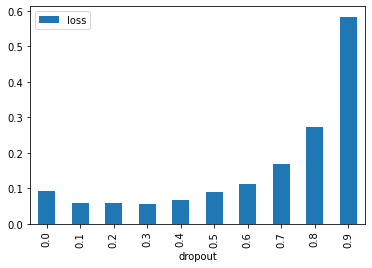

In [ ]:
df.plot.bar(x='dropout', y='loss')

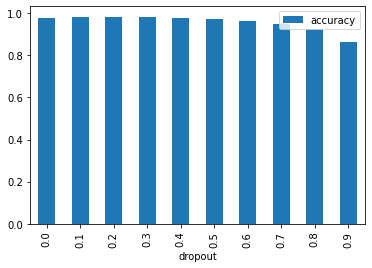

In [ ]:
df.plot.bar(x='dropout', y='accuracy')

In [ ]:
model.summary()

Model: "CM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         multiple                  0         
_________________________________________________________________
dense_57 (Dense)             multiple                  200960    
_________________________________________________________________
batch_normalization_38 (Batc multiple                  1024      
_________________________________________________________________
activation_19 (Activation)   multiple                  0         
_________________________________________________________________
dropout_19 (Dropout)         multiple                  0         
_________________________________________________________________
dense_58 (Dense)             multiple                  32896     
_________________________________________________________________
batch_normalization_39 (Batc multiple                  512      